<a href="https://colab.research.google.com/github/TasnimZannatNaima/EDGEIT22001/blob/main/django_project_naima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Event Countdown Timer using Django**

An event countdown timer using Django in Python can be created by storing the event's datetime in a Django model and using JavaScript to display a live countdown on a web page based on the current time and the event's datetime.

**Setting Up the Project Folder**

To start the project use this command:


```
django-admin startproject core
cd core
```
To start the app use this command:


```
python manage.py startapp home
```
Now add this app to the ‘settings.py’


```
INSTALLED_APPS = [
    "django.contrib.admin",
    "django.contrib.auth",
    "django.contrib.contenttypes",
    "django.contrib.sessions",
    "django.contrib.messages",
    "django.contrib.staticfiles",
    "home",
]
```


**Setting Necessary Files**
core/models.py: Here we have created an Event table with name, and event_date field in the table.






In [ ]:
from django.contrib import admin
from .models import Event

# Register your models here.
admin.site.register(Event


**core/views.py** : In below code view fetches the first Event object, calculates the time remaining until its event date, and formats it into hours, minutes, and seconds. If no event exists, it renders 'No Event' with all time values set to zero. Finally, it passes the data to the 'myapp.html' template for rendering.

In [ ]:
from django.shortcuts import render

# Create your views here.
from django.utils import timezone
from .models import Event  # Import the Event model from your app

def countdown_timer(request):
    event = Event.objects.first()  # Retrieve the first Event object
    if event:
        time_remaining = event.event_date - timezone.now()  # Calculate time remaining
        hours = time_remaining.seconds // 3600
        minutes = (time_remaining.seconds % 3600) // 60
        seconds = time_remaining.seconds % 60
        data = {
            'name': event.name,
            'hours': hours,
            'minutes': minutes,
            'seconds': seconds
        }
    else:
        data = {
            'name': "No Event",
            'hours': 0,
            'minutes': 0,
            'seconds': 0
        }
    return render(request, 'myapp.html', {'data': data})

**core/urls.py :** Below Django urlpatterns configuration sets up routes for accessing the admin interface and includes routes defined in the 'home' app.

In [ ]:
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path('admin/', admin.site.urls),
    path('', include('home.urls'))

]

**home/urls.py :** Below urlpatterns configuration maps the root URL to the countdown_timer view function from the current application, with the name 'countdown_timer'.

In [ ]:
from django.urls import path
from . import views

urlpatterns = [
    path('', views.countdown_timer, name='countdown_timer'),
]

**Creating GUI our Project**


**home/templates/myapp.html:** This page will show the timer and event name.

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Event Countdown Timer</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            text-align: center;
            background-color: #f4f4f4;
        }

        h1 {
            color: #333;
        }

        #timer {
            background-color: #fff;
            border-radius: 5px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
            padding: 20px;
            margin: 20px auto;
            max-width: 300px;
        }

        #countdown {
            font-size: 24px;
            font-weight: bold;
            color: #e44d26;
        }

        #event {
            font-size: 34px;
            font-weight: bold;
            color: #221d1c;
        }
    </style>
</head>
<body>
    <h1>Event Countdown Timer</h1>
    <div id="timer">
        <h3 id="event">{{ data.name }}</h3>
        <h2>Time Remaining:</h2>
        <div id="countdown">
            {{ data.hours|stringformat:"02d" }} : {{ data.minutes|stringformat:"02d" }} : {{ data.seconds|stringformat:"02d" }}
        </div>
    </div>

    <script>
        // Function to update the countdown timer
        function updateTimer() {
            var hours = parseInt(document.getElementById('countdown').textContent.split(':')[0]);
            var minutes = parseInt(document.getElementById('countdown').textContent.split(':')[1]);
            var seconds = parseInt(document.getElementById('countdown').textContent.split(':')[2]);

            if (seconds > 0) {
                seconds--;
            } else {
                if (minutes > 0) {
                    minutes--;
                    seconds = 59;
                } else {
                    if (hours > 0) {
                        hours--;
                        minutes = 59;
                        seconds = 59;
                    } else {
                        // Timer has reached zero, you can handle this case as needed
                    }
                }
            }

            // Update the timer display
            document.getElementById('countdown').textContent =
                (hours < 10 ? '0' : '') + hours + ' : ' +
                (minutes < 10 ? '0' : '') + minutes + ' : ' +
                (seconds < 10 ? '0' : '') + seconds;
        }

        // Update the timer every second
        setInterval(updateTimer, 1000);
    </script>
</body>
</html>

**admin.py:**Here we are registering our models.

In [ ]:
from django.contrib import admin
from .models import Event

admin.site.register(Event)

**Deployement of the Project**


Run these commands to apply the migrations:


```
python3 manage.py makemigrations
python3 manage.py migrate
```
Before running the development server, create a superuser and add an event in the Django admin panel:


```
python3 manage.py createsuperuser
```
After creating super user, go admin pannel and add event.
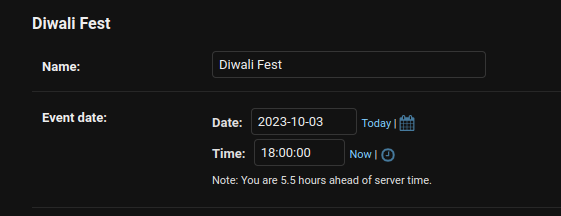


Run the server with the help of following command

```
python3 manage.py runserver

```
Output:

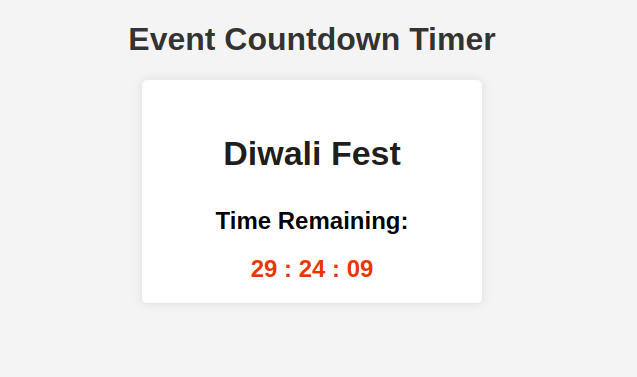
